In [1]:
!pip install face_recognition
!pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=95418cbc88ef92fe9379d1c01c67cb6533d424c846f857d11b432d28f1dce7f3
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


# Mount Google Drive


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Extract Zip Files

In [12]:
import zipfile

# Unzipping known.zip
with zipfile.ZipFile('/content/drive/MyDrive/known.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/known')

# Unzipping unknown.zip
with zipfile.ZipFile('/content/drive/MyDrive/unknown.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/unknown')


In [14]:
!ls -l /content/known/known/
!ls -l /content/unknown/unknown/


total 5484
-rw-r--r-- 1 root root   16571 Oct  9 07:35 'Aaron Peirsol.jpg'
-rw-r--r-- 1 root root   14802 Oct  9 07:35 'Adam Sandler.jpg'
-rw-r--r-- 1 root root   14100 Oct  9 07:35 'Adam Scott.jpg'
-rw-r--r-- 1 root root   14395 Oct  9 07:35 'Ben Affleck.jpg'
-rw-r--r-- 1 root root   59093 Oct  9 07:35 'Donald Trump.jpg'
-rw-r--r-- 1 root root 5480652 Oct  9 07:35 'Mike Pence.jpg'
total 76
-rw-r--r-- 1 root root 14060 Oct  9 07:35 Aaron_Peirsol_0003.jpg
-rw-r--r-- 1 root root 14745 Oct  9 07:35 Adam_Sandler_0004.jpg
-rw-r--r-- 1 root root 10212 Oct  9 07:35 Adam_Scott_0002.jpg
-rw-r--r-- 1 root root 16764 Oct  9 07:35 Ben_Affleck_0007.jpg
-rw-r--r-- 1 root root 11967 Oct  9 07:35 Zydrunas_Ilgauskas_0001.jpg


# Load and Process Images

In [15]:
import face_recognition
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Folder paths for known and unknown images
known_images_path = '/content/known/known/'
unknown_images_path = '/content/unknown/unknown/'

# Step 1: Process known images
known_face_encodings = []
known_face_names = []

# Load and encode known images
for filename in os.listdir(known_images_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(known_images_path, filename)
        image = face_recognition.load_image_file(image_path)
        encoding = face_recognition.face_encodings(image)[0]
        known_face_encodings.append(encoding)
        known_face_names.append(os.path.splitext(filename)[0])  # Name from file name

# Step 2: Process unknown images and compare with known faces
for filename in os.listdir(unknown_images_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(unknown_images_path, filename)
        unknown_image = face_recognition.load_image_file(image_path)
        unknown_face_encodings = face_recognition.face_encodings(unknown_image)

        # Check each face in the unknown image
        for unknown_encoding in unknown_face_encodings:
            results = face_recognition.compare_faces(known_face_encodings, unknown_encoding)
            face_distances = face_recognition.face_distance(known_face_encodings, unknown_encoding)
            best_match_index = np.argmin(face_distances)

            # Display result
            if results[best_match_index]:
                print(f"{filename} is recognized as {known_face_names[best_match_index]}")
            else:
                print(f"{filename} is not recognized")


Aaron_Peirsol_0003.jpg is recognized as Aaron Peirsol
Adam_Scott_0002.jpg is not recognized
Adam_Sandler_0004.jpg is recognized as Adam Sandler
Ben_Affleck_0007.jpg is recognized as Ben Affleck
Zydrunas_Ilgauskas_0001.jpg is not recognized


# Display Resulting Image

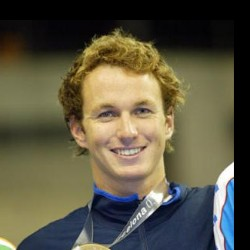

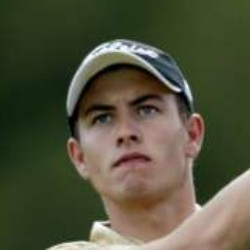

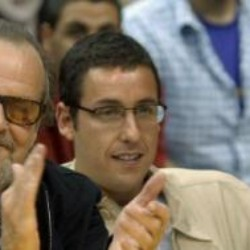

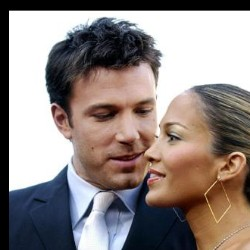

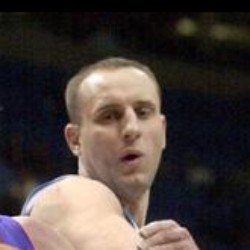

In [16]:
# Displaying recognized images
for filename in os.listdir(unknown_images_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(unknown_images_path, filename)
        unknown_image = cv2.imread(image_path)
        cv2_imshow(unknown_image)
